In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#semih is here

In [ ]:
# orders_cl.csv
url = "https://drive.google.com/file/d/1H4SaPxIQDpQGINSSQnAgmvUGvwHX61NP/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_cl = pd.read_csv(path)

In [ ]:
orders_df = orders_cl.copy()

In [ ]:
np.round(orders_df['total_paid'].sum(), decimals= 1)

np.float64(7978675.6)

In [ ]:
url = "https://drive.google.com/file/d/1d65Rm9fxxYl2XHFWUMABZYFWCG-tf0fj/view?usp=sharing" # brands.csv
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

In [ ]:
brand_df=brands.copy()

In [ ]:
url = "https://drive.google.com/file/d/1KHcTm46Wz-gNSV0WVJkYB7qq_pt_Aqv3/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_cl = pd.read_csv(path)

In [ ]:
orderlines_df=orderlines_cl.copy()

In [ ]:
url = "https://drive.google.com/file/d/1KI0MZ4dQ1oKjYNgX2Mc0ELrSxSDgajVI/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
product_cl = pd.read_csv(path)

In [ ]:
products_df=product_cl.copy()

In [ ]:
products_df["brand_short"] = products_df["sku"].str[:3]

In [ ]:
products_merged = products_df.merge(brand_df, how="left", left_on="brand_short", right_on="short")
products_merged.rename(columns={"long": "brand_name"}, inplace=True)

In [ ]:
url= "https://drive.google.com/file/d/1543b9AKPFO5HqkjIMwQsdF4fJFhADUyU/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
product_cat_cl = pd.read_csv(path)

In [ ]:
products_merged.sample(5)

,sku,name,desc,price,in_stock,type,brand_short,short,brand_name
9427,TUC0266-A,"Open - Tucano iPad Case Giro Pro 97 ""Black",Reconditioned Rotary Case for iPad Pro 97,39.99,0,12635403,TUC,TUC,Tucano
6640,WDT0242-A,"Open - Western Digital Network 5TB 35 ""PC and ...",WD Hard Drive refurbished and designed to 5TB NAS,270.00,0,1298,WDT,WDT,Western Digital
6043,MUV0169-A,"Open - Muvit On / Off iPad Case Pro 97 ""Black",Cover and support functions on and off for iPa...,22.95,0,1298,MUV,MUV,Muvit
7701,SAM0109-A,Open - Samsung EVO SSD 750 500 GB,SSD Hard Drive SATA 6 Gb / s 25-inch NAND tech...,149.99,0,1298,SAM,SAM,Samsung
1145,APP1928,Apple Mac mini Core i7 3GHz | 16GB RAM | 1TB F...,Apple desktop Mac mini Core i7 3GHz | 8GB RAM ...,1579.00,0,1282,APP,APP,Apple


In [ ]:
merged2 = orderlines_df.merge(product_cat_cl, how="left", on="sku")
merged2.rename(columns={"long": "brand_name"}, inplace=True)

In [ ]:
oop_merged = orders_df.merge(merged2, how="inner", left_on="order_id", right_on="id_order") # order, orderlines and products

In [ ]:
oop_merged["date"] = pd.to_datetime(oop_merged["date"], errors="coerce") #change type of date to datetime
oop_merged["created_date"] = pd.to_datetime(oop_merged["created_date"], errors="coerce")

In [ ]:
oop_merged["discount_pct"] = ((oop_merged["price"] - oop_merged["unit_price"]) / oop_merged["price"]) * 100


In [ ]:
oop_merged["discount_pct"] = oop_merged["discount_pct"].clip(lower=0)

In [ ]:
bins = [0, 25, 100, 300, 1000, 2000]
labels = ["0 < Budget < 25", "25< Affordable < 100", "100< Mid-range <300", "300 < Premium < 1000", "Luxury > 1000"]
oop_merged["price_category"] = pd.cut(oop_merged["price"], bins=bins, labels=labels, include_lowest=True)


In [ ]:
category_counts = oop_merged["price_category"].value_counts().sort_index()
discounted_products = oop_merged[oop_merged["discount_pct"] > 0]["sku"].nunique()
discount_summary = oop_merged["discount_pct"].describe()

In [ ]:
oop_merged.sort_values('price', ascending=False).head(30)['price']

,price
12304,1799.00
13661,1799.00
18152,1799.00
8661,1699.00
29212,1499.00
13769,1499.00
9107,1499.00
13531,1499.00
14644,1499.00
26441,1499.00


In [ ]:
Total_revenue = orders_df["total_paid"].sum()
Total_revenue

np.float64(7978675.599999999)

In [ ]:
category_counts.head(2)

,count
price_category,
0 < Budget < 25,7561
25< Affordable < 100,24125


In [ ]:
bins2 = [0, 25, 100, 300, 1000]

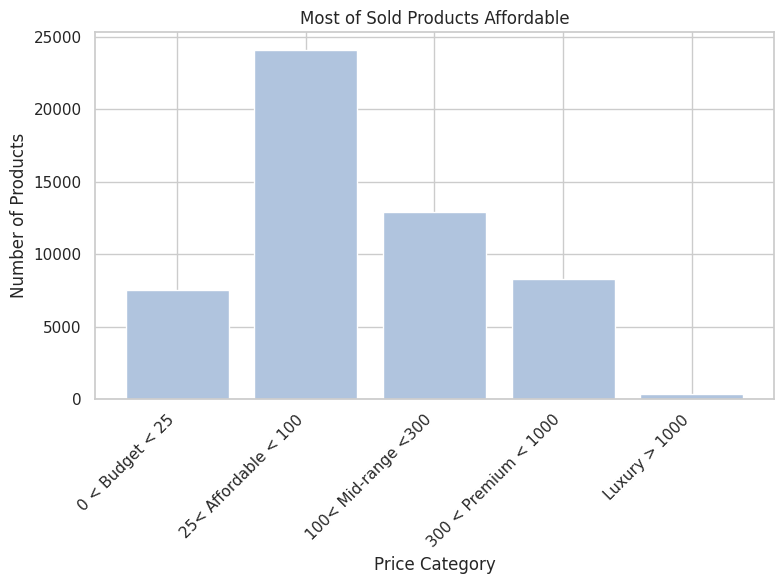

In [ ]:
plt.figure(figsize=(8, 6))
bars2 = plt.bar(category_counts.index, category_counts.values, color='lightsteelblue')
plt.xlabel("Price Category")
plt.ylabel("Number of Products")
# Removed plt.bar_label(plt.gca().containers[0])
plt.title("Most of Sold Products Affordable")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

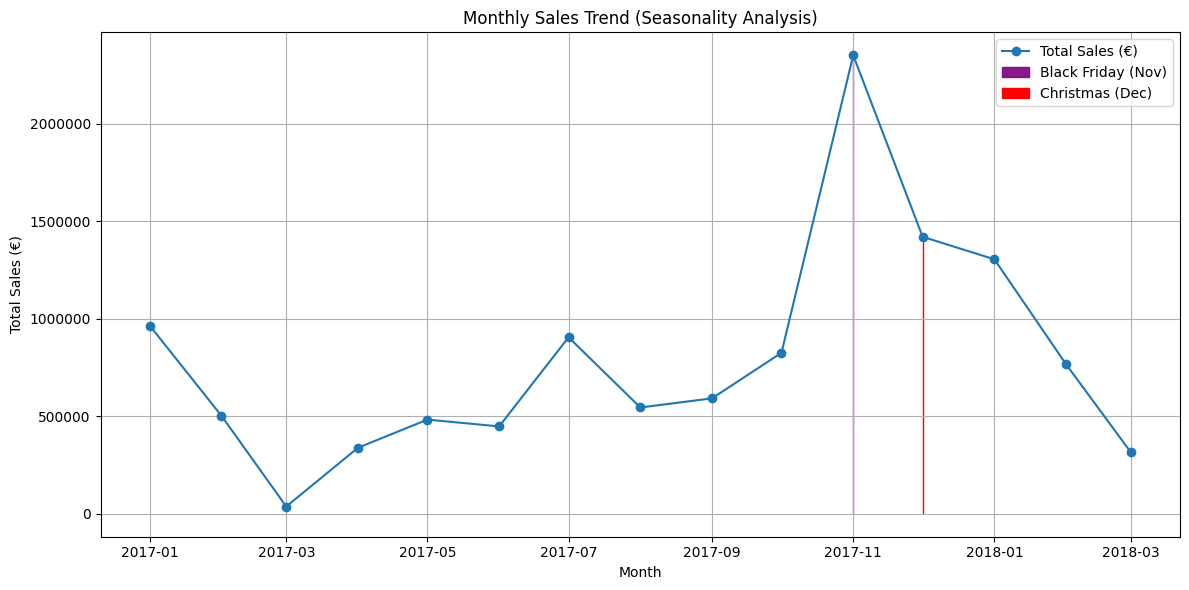

np.float64(139.71366133090538)

In [ ]:
import numpy as np
import matplotlib.dates as mdates

oop_merged["month"] = oop_merged["created_date"].dt.to_period("M")
monthly_sales = oop_merged.groupby("month")["total_paid"].sum().reset_index()
monthly_sales["month"] = monthly_sales["month"].dt.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales["month"], monthly_sales["total_paid"], marker="o", label="Total Sales (€)")
plt.title("Monthly Sales Trend (Seasonality Analysis)")
plt.xlabel("Month")
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel("Total Sales (€)")

x = mdates.date2num(monthly_sales["month"])
y = monthly_sales["total_paid"].values
mask_bf = monthly_sales["month"].dt.month == 11
mask_xmas = monthly_sales["month"].dt.month == 12

plt.fill_between(x, y, where=mask_bf, color="purple", alpha=0.9, label="Black Friday (Nov)")
plt.fill_between(x, y, where=mask_xmas, color="red", alpha=1, label="Christmas (Dec)")

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

monthly_avg = monthly_sales["total_paid"].mean()
special_periods = monthly_sales[monthly_sales["month"].dt.month.isin([11, 12])]
relative_increase = (special_periods["total_paid"].mean() / monthly_avg - 1) * 100
relative_increase
#Presentation
#### Interpretation of Resulst 2:
  #Recorded Data from 01/2017 till 03/2018
  #Max monthly sale 2.351.984 € happens in 11/2017
  #The least monthly sale 37371.6 was in 03/2017
  # continous growth in the time between 03-2017 till 07-2017
  #Seasional effect: Black friday end of November 2017
  #Seasional effect: Decrease of steepnes/slop of the curve in 12-2017: Christmas Season

In [ ]:
test_data= oop_merged.copy()

In [ ]:
test_data.drop_duplicates(subset=['order_id'], inplace=True)

In [ ]:
test_data.groupby('brand_name')['total_paid'].sum().loc['Apple'] / test_data['total_paid'].sum()*100

np.float64(32.00545313560561)

In [ ]:
test_data.query("order_id == '440828'")

,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,...,category,short_sku,short,brand_name,KS_general_category,KS_detailed_category,general_category,discount_pct,price_category,month


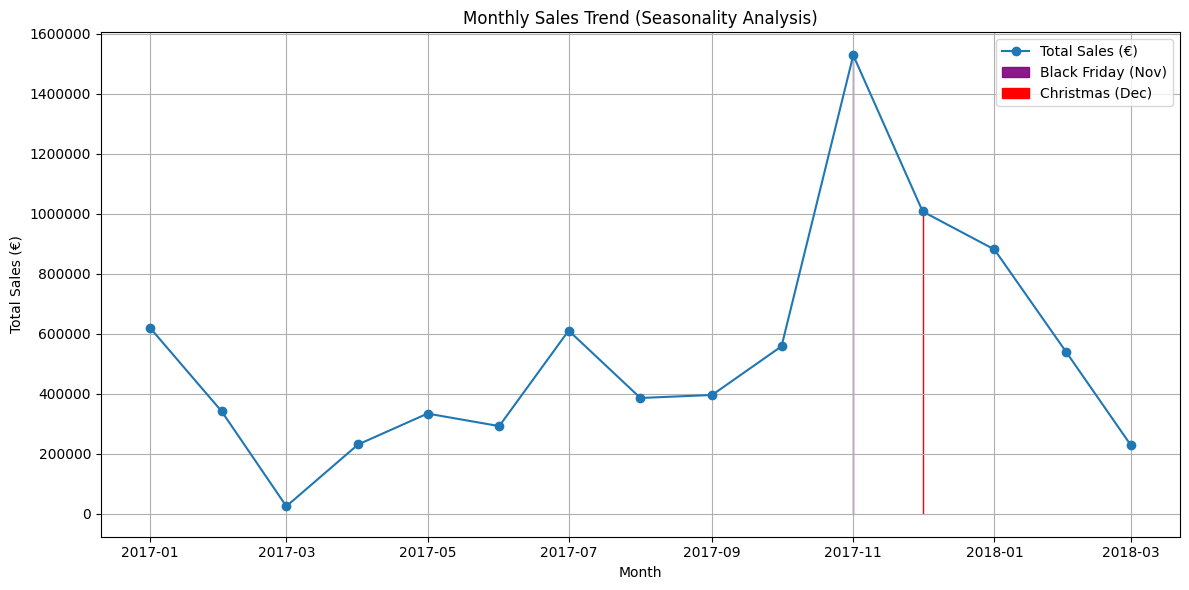

np.float64(138.32299592428598)

In [ ]:
test_data["month"] = test_data["created_date"].dt.to_period("M")
monthly_sales = test_data.groupby("month")["total_paid"].sum().reset_index()
monthly_sales["month"] = monthly_sales["month"].dt.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales["month"], monthly_sales["total_paid"], marker="o", label="Total Sales (€)")
plt.title("Monthly Sales Trend (Seasonality Analysis)")
plt.xlabel("Month")
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel("Total Sales (€)")

x = mdates.date2num(monthly_sales["month"])
y = monthly_sales["total_paid"].values
mask_bf = monthly_sales["month"].dt.month == 11
mask_xmas = monthly_sales["month"].dt.month == 12

plt.fill_between(x, y, where=mask_bf, color="purple", alpha=0.9, label="Black Friday (Nov)")
plt.fill_between(x, y, where=mask_xmas, color="red", alpha=1, label="Christmas (Dec)")

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

monthly_avg = monthly_sales["total_paid"].mean()
special_periods = monthly_sales[monthly_sales["month"].dt.month.isin([11, 12])]
relative_increase = (special_periods["total_paid"].mean() / monthly_avg - 1) * 100
relative_increase

In [ ]:
test_data.groupby('state').nunique()

,order_id,created_date,total_paid,id,id_order,product_id,product_quantity,sku,unit_price,date,...,category,short_sku,short,brand_name,KS_general_category,KS_detailed_category,general_category,discount_pct,price_category,month
state,,,,,,,,,,,,,,,,,,,,,
Completed,40985,40914,9878,40985,40985,1,26,4678,3989,40913,...,10,192,177,173,11,58,8,7937,5,15


In [ ]:
test_data.query("brand_name == 'Nonda'")

,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,...,category,short_sku,short,brand_name,KS_general_category,KS_detailed_category,general_category,discount_pct,price_category,month
11513,354031,2017-05-08 23:40:27,15.98,Completed,1244189,354031,0,1,NDA0010,11.99,...,NaN,NDA,NDA,Nonda,Laptop,MacBook,Accessory,4.385965,0 < Budget < 25,2017-05
12891,360335,2017-05-29 19:00:52,23.98,Completed,1257548,360335,0,2,NDA0009,11.99,...,NaN,NDA,NDA,Nonda,Laptop,MacBook,Accessory,4.385965,0 < Budget < 25,2017-05
26575,416535,2017-10-24 00:07:33,36.98,Completed,1386257,416535,0,1,NDA0007,29.99,...,NaN,NDA,NDA,Nonda,Tablet,iPad,Accessory,30.239591,25< Affordable < 100,2017-10
28156,422377,2017-11-06 04:55:38,36.98,Completed,1398398,422377,0,1,NDA0007,29.99,...,NaN,NDA,NDA,Nonda,Tablet,iPad,Accessory,30.239591,25< Affordable < 100,2017-11
33036,440828,2017-11-25 12:04:03,1351.96,Completed,1440992,440828,0,1,NDA0007,25.49,...,NaN,NDA,NDA,Nonda,Tablet,iPad,Accessory,40.707141,25< Affordable < 100,2017-11
36316,454226,2017-12-03 06:49:19,28.97,Completed,1474101,454226,0,2,NDA0009,11.99,...,NaN,NDA,NDA,Nonda,Laptop,MacBook,Accessory,4.385965,0 < Budget < 25,2017-12
36606,455830,2017-12-18 18:31:44,27.99,Completed,1478247,455830,0,1,NDA0008,27.99,...,NaN,NDA,NDA,Nonda,Tablet,iPad,Accessory,3.449465,25< Affordable < 100,2017-12
36656,456091,2017-12-06 10:50:03,34.98,Completed,1478798,456091,0,1,NDA0007,29.99,...,NaN,NDA,NDA,Nonda,Tablet,iPad,Accessory,30.239591,25< Affordable < 100,2017-12
36995,458084,2017-12-09 11:59:03,64.97,Completed,1484143,458084,0,1,NDA0009,11.99,...,NaN,NDA,NDA,Nonda,Laptop,MacBook,Accessory,4.385965,0 < Budget < 25,2017-12


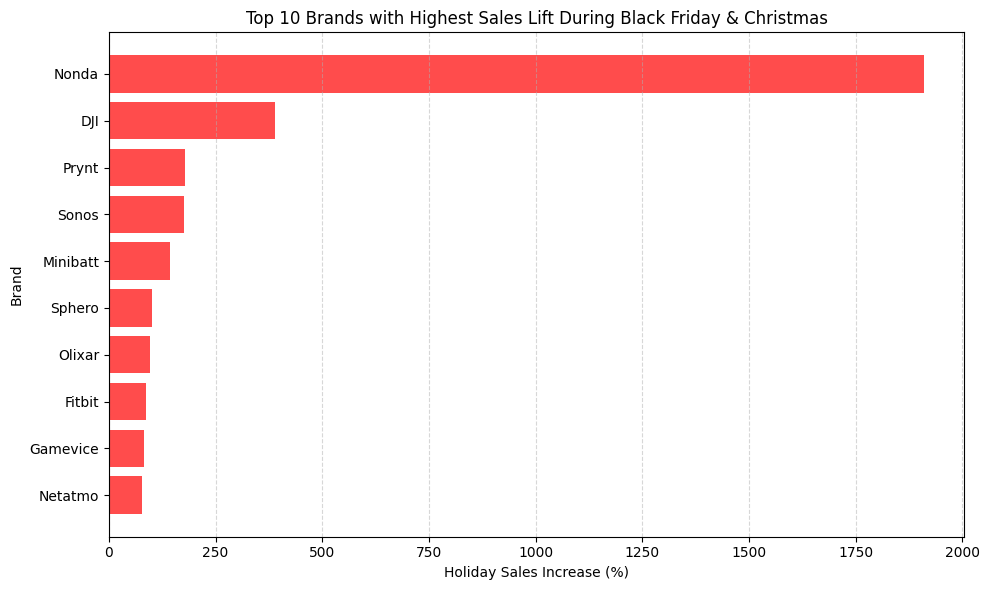

,brand_name,Regular_Sales,Holiday_Sales,Holiday_Lift_%
95,Nonda,76.94,1545.85,1909.162984
22,DJI,1997.90,9753.69,388.197107
110,Prynt,1110.33,3095.47,178.788288
133,Sonos,21159.90,58171.03,174.911649
78,Minibatt,1282.36,3121.64,143.429302
135,Sphero,9119.02,18331.65,101.026536
98,Olixar,24.98,48.97,96.036829
36,Fitbit,5303.70,9971.95,88.018742
38,Gamevice,267.27,484.91,81.430763
88,Netatmo,16939.43,30030.47,77.281467


In [ ]:
test_data["month_num"] = test_data["created_date"].dt.month
test_data["is_special_period"] = test_data["month_num"].isin([11, 12])

brand_sales = (
    test_data.groupby(["brand_name", "is_special_period"])["total_paid"]
    .sum()
    .unstack(fill_value=0)
    .reset_index()
)

brand_sales.columns = ["brand_name", "Regular_Sales", "Holiday_Sales"]

brand_sales["Holiday_Lift_%"] = (
    (brand_sales["Holiday_Sales"] / brand_sales["Regular_Sales"] - 1) * 100
).replace([np.inf, -np.inf], np.nan)

top_brands = brand_sales.sort_values("Holiday_Lift_%", ascending=False).head(10)


plt.figure(figsize=(10, 6))
plt.barh(top_brands["brand_name"], top_brands["Holiday_Lift_%"], color="red", alpha=0.7)
plt.title("Top 10 Brands with Highest Sales Lift During Black Friday & Christmas")
plt.xlabel("Holiday Sales Increase (%)")
plt.ylabel("Brand")
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

top_brands
#### Interpretation of Resulst 3:
##presentation

In [ ]:
top_brands

,brand_name,Regular_Sales,Holiday_Sales,Holiday_Lift_%
95,Nonda,76.94,1545.85,1909.162984
22,DJI,1997.90,9753.69,388.197107
110,Prynt,1110.33,3095.47,178.788288
133,Sonos,21159.90,58171.03,174.911649
78,Minibatt,1282.36,3121.64,143.429302
135,Sphero,9119.02,18331.65,101.026536
98,Olixar,24.98,48.97,96.036829
36,Fitbit,5303.70,9971.95,88.018742
38,Gamevice,267.27,484.91,81.430763
88,Netatmo,16939.43,30030.47,77.281467


In [ ]:
oop_merged[oop_merged["brand_name"] == "Nest"  ][["brand_name","desc", "KS_general_category"]].head(2)

,brand_name,desc,KS_general_category
31232,Nest,energy savings and comfort in your home thanks...,Accessory
31233,Nest,Support 100% compatible with Nest Learning the...,Accessory


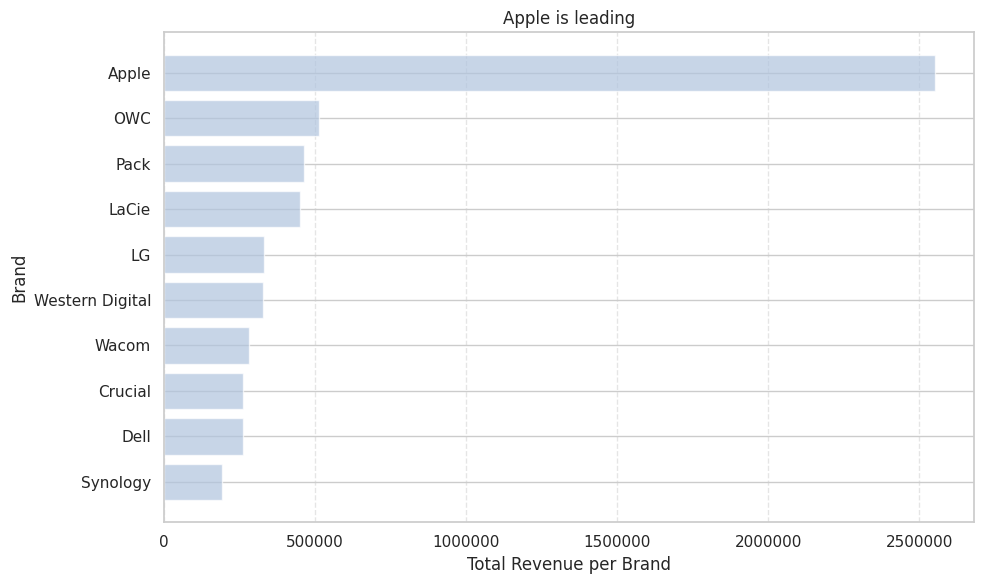

,brand_name,total_paid
5,Apple,"2,553,611.28"
96,OWC,"512,395.18"
103,Pack,"461,995.70"
66,LaCie,"450,995.47"
64,LG,"328,941.20"
158,Western Digital,"326,175.48"
157,Wacom,"280,552.33"
18,Crucial,"262,042.62"
23,Dell,"259,605.09"
141,Synology,"190,094.08"


In [ ]:
test_data["month_num"] = test_data["created_date"].dt.month

brand_sales = (
    test_data.groupby(["brand_name"])["total_paid"]
    .sum()
    .reset_index()
)

top_brands = brand_sales.sort_values(['total_paid'], ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_brands["brand_name"], top_brands["total_paid"], color="lightsteelblue", alpha=0.7)
plt.title("Apple is leading")
plt.xlabel("Total Revenue per Brand")
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel("Brand")
plt.gca().invert_yaxis()
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

top_brands
# no presentation

In [ ]:
oop_merged[oop_merged['brand_name'] == "Western Digital"][['brand_name',"price_category" ]].head()

,brand_name,price_category
52,Western Digital,100< Mid-range <300
69,Western Digital,100< Mid-range <300
123,Western Digital,100< Mid-range <300
150,Western Digital,100< Mid-range <300
161,Western Digital,100< Mid-range <300


In [ ]:
top_brands.describe()

,total_paid
count,1.000000e+01
mean,5.626408e+05
std,7.071200e+05
min,1.900941e+05
25%,2.666700e+05
50%,3.275583e+05
75%,4.592456e+05
max,2.553611e+06


In [ ]:
# The error is because you are trying to access a row by a string index 'brand_name=Apple'
# when the index is an integer index.
# To fix this, filter the DataFrame where the 'brand_name' column is 'Apple' and then select the 'total_paid' column.
apple_total_paid = top_brands[top_brands['brand_name'] == 'Apple']['total_paid'].iloc[0]
print(f"Total paid for Apple: {apple_total_paid}")

Total paid for Apple: 2553611.28


In [ ]:
top_brands = brand_sales.sort_values(['total_paid'], ascending=False).head(10).set_index('brand_name')
oop_merged["total_paid"].sum() - top_brands.loc["Apple", "total_paid"]

np.float64(9250075.280000001)

In [ ]:
oop_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_id              53231 non-null  int64         
 1   created_date          53231 non-null  datetime64[ns]
 2   total_paid            53231 non-null  float64       
 3   state                 53231 non-null  object        
 4   id                    53231 non-null  int64         
 5   id_order              53231 non-null  int64         
 6   product_id            53231 non-null  int64         
 7   product_quantity      53231 non-null  int64         
 8   sku                   53231 non-null  object        
 9   unit_price            53231 non-null  float64       
 10  date                  53231 non-null  datetime64[ns]
 11  name                  53231 non-null  object        
 12  desc                  53231 non-null  object        
 13  price           

In [ ]:
oop_merged.to_csv('oop_merged.csv', index=False)

In [ ]:
oop_merged.groupby('KS_general_category').nunique()


,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,...,type,category,short_sku,short,brand_name,KS_detailed_category,general_category,discount_pct,price_category,month
KS_general_category,,,,,,,,,,,,,,,,,,,,,
Accessory,13527,13517,4716,1,15679,13527,1,15,1842,1431,...,61,2,138,132,129,10,7,2697,5,15
Apple Keyboard,9,9,9,1,9,9,1,2,3,3,...,3,0,3,3,3,1,1,3,1,7
Computer Components,3822,3821,2017,1,3954,3822,1,9,394,795,...,17,1,17,16,15,2,4,1091,5,15
Hard Drive / SSD,7253,7251,4125,1,7802,7253,1,18,535,1667,...,8,1,22,22,21,3,3,2292,5,15
Headphones,207,207,160,1,224,207,1,3,36,65,...,5,0,7,7,7,2,2,65,4,15
Keyboard,817,817,436,1,824,817,1,8,24,71,...,2,1,9,9,8,1,2,72,3,15
Laptop,4001,4000,1727,1,4381,4001,1,7,466,538,...,23,1,43,43,40,5,3,775,5,15
Monitor,2826,2826,1332,1,2906,2826,1,12,233,510,...,18,0,38,38,37,1,4,557,5,15
Phone,3635,3635,1387,1,3932,3635,1,6,332,395,...,29,2,37,37,35,12,2,456,5,15


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
df = oop_merged.copy()

COL_CAT   = "KS_general_category"
COL_PRICE = "price"
COL_UNIT  = "unit_price"
COL_DATE  = "date"
COL_QTY   = "product_quantity"
COL_TOTAL = "total_paid"

df[COL_DATE]  = pd.to_datetime(df[COL_DATE], errors="coerce")
for c in [COL_PRICE, COL_UNIT, COL_QTY, COL_TOTAL]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df[COL_CAT] = df[COL_CAT].fillna("Uncategorized").astype(str)

df["is_discounted"] = (df[COL_UNIT] < df[COL_PRICE]) & (df[COL_PRICE] > 0)
df["discount_pct"]  = np.where(df[COL_PRICE] > 0,
                               (df[COL_PRICE] - df[COL_UNIT]) / df[COL_PRICE],
                               np.nan)
df.head()


,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,...,short_sku,short,brand_name,KS_general_category,KS_detailed_category,general_category,discount_pct,price_category,month,is_discounted
0,241423,2017-11-06 13:10:02,136.15,Completed,1398738,241423,0,1,LAC0212,129.16,...,LAC,LAC,LaCie,Hard Drive / SSD,HDD/SSD,Hard Drive/SSD,0.08,100< Mid-range <300,2017-11,True
1,242832,2017-12-31 17:40:03,15.76,Completed,1529178,242832,0,1,PAR0074,10.77,...,PAR,PAR,Parrot,Accessory,Accessory,Accessory,0.40,0 < Budget < 25,2017-12,True
2,243330,2017-02-16 10:59:38,84.98,Completed,1181923,243330,0,1,OWC0074,77.99,...,OWC,OWC,OWC,Computer Components,RAM,Hard Drive/SSD,0.22,25< Affordable < 100,2017-02,True
3,245275,2017-06-28 11:35:37,149.00,Completed,1276706,245275,0,1,TAD0007,149.00,...,TAD,TAD,Tado,Accessory,Accessory,Accessory,0.17,100< Mid-range <300,2017-06,True
4,245595,2017-01-21 12:52:47,112.97,Completed,1154394,245595,0,2,PAC1561,52.99,...,PAC,PAC,Pack,Hard Drive / SSD,HDD/SSD,Hard Drive/SSD,0.49,100< Mid-range <300,2017-01,True


In [ ]:
top_cats = df[COL_CAT].value_counts().head(12).index
df_top = df[df[COL_CAT].isin(top_cats)].copy()
df_top.head()

,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,...,short_sku,short,brand_name,KS_general_category,KS_detailed_category,general_category,discount_pct,price_category,month,is_discounted
0,241423,2017-11-06 13:10:02,136.15,Completed,1398738,241423,0,1,LAC0212,129.16,...,LAC,LAC,LaCie,Hard Drive / SSD,HDD/SSD,Hard Drive/SSD,0.08,100< Mid-range <300,2017-11,True
1,242832,2017-12-31 17:40:03,15.76,Completed,1529178,242832,0,1,PAR0074,10.77,...,PAR,PAR,Parrot,Accessory,Accessory,Accessory,0.40,0 < Budget < 25,2017-12,True
2,243330,2017-02-16 10:59:38,84.98,Completed,1181923,243330,0,1,OWC0074,77.99,...,OWC,OWC,OWC,Computer Components,RAM,Hard Drive/SSD,0.22,25< Affordable < 100,2017-02,True
3,245275,2017-06-28 11:35:37,149.00,Completed,1276706,245275,0,1,TAD0007,149.00,...,TAD,TAD,Tado,Accessory,Accessory,Accessory,0.17,100< Mid-range <300,2017-06,True
4,245595,2017-01-21 12:52:47,112.97,Completed,1154394,245595,0,2,PAC1561,52.99,...,PAC,PAC,Pack,Hard Drive / SSD,HDD/SSD,Hard Drive/SSD,0.49,100< Mid-range <300,2017-01,True


In [ ]:
z=df_top.groupby('KS_general_category')['product_quantity'].sum()
z

,product_quantity
KS_general_category,
Accessory,17261
Apple Keyboard,10
Computer Components,4714
Hard Drive / SSD,9578
Headphones,234
Keyboard,951
Laptop,4617
Monitor,3250
Phone,4166


In [ ]:
c=z.sort_values(ascending=False)

In [ ]:
q = z.sort_values(ascending=False)[:3]

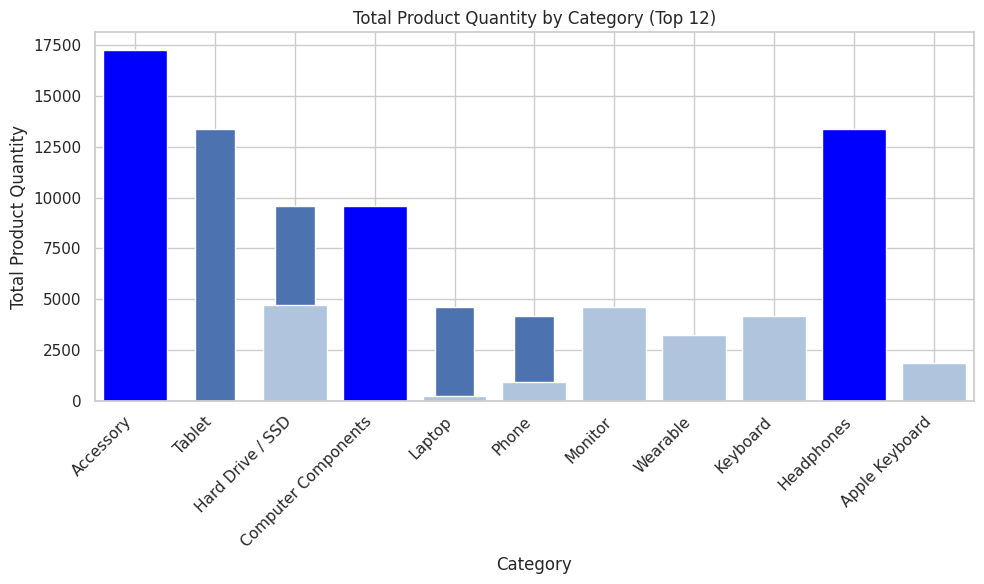

In [ ]:
plt.figure(figsize=(10, 6))
z.sort_values(ascending=False).plot(kind='bar')
plt.title("Total Product Quantity by Category (Top 12)")
plt.xlabel("Category")
plt.ylabel("Total Product Quantity")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Corrected code for colors
colors = ['blue' if category in q.index else 'lightsteelblue' for category in z.index]
plt.bar(z.index, z.values, color=colors)


plt.show()

In [ ]:
q = z.sort_values(ascending=False)[:3]

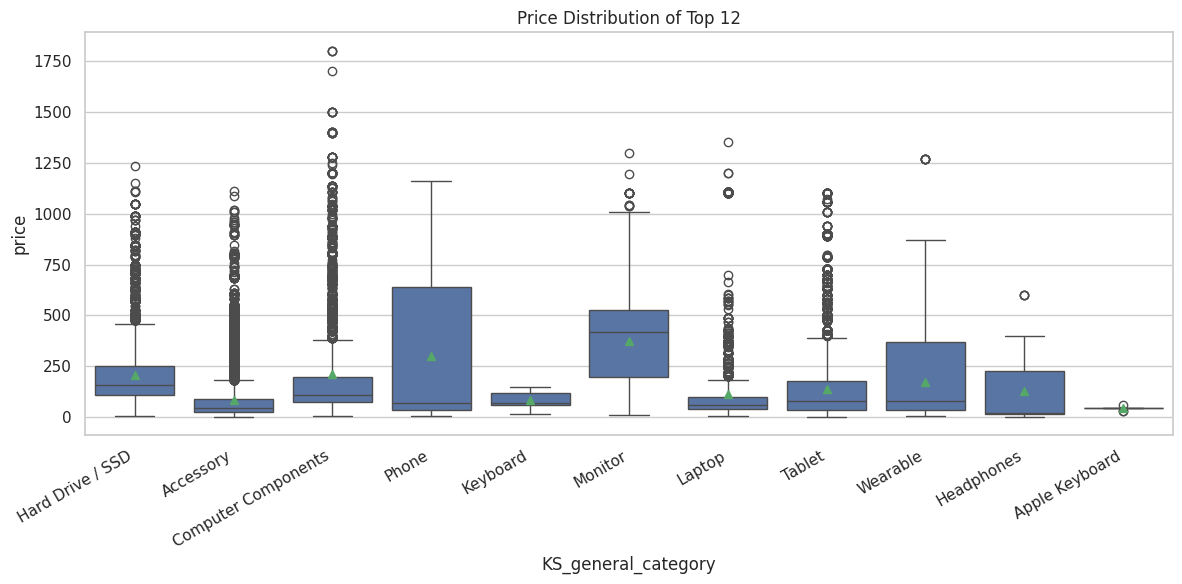

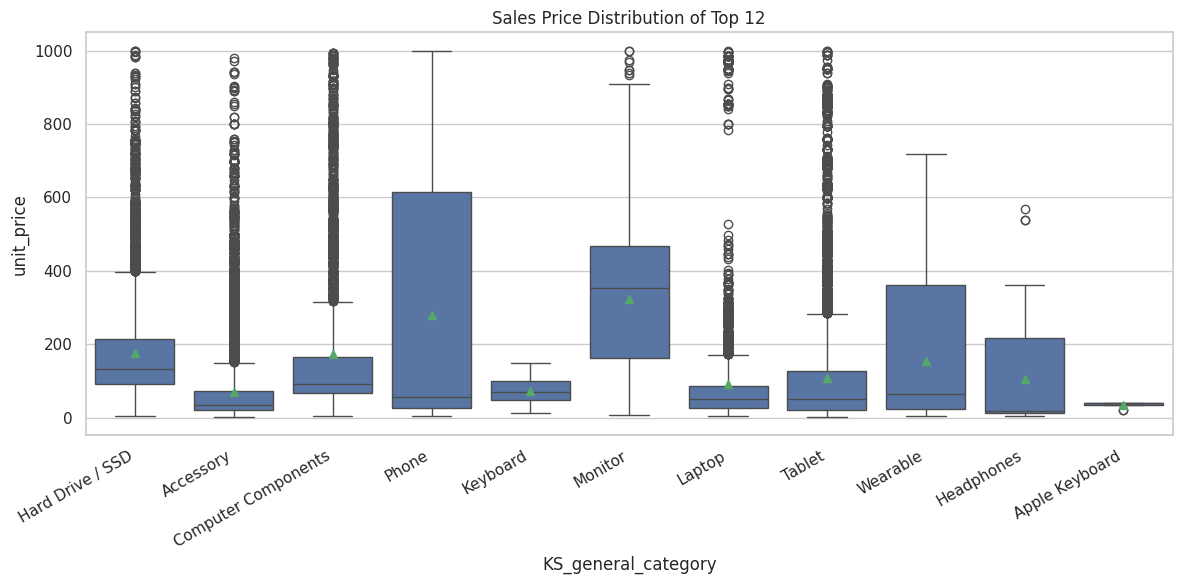

In [ ]:
top_cats = df[COL_CAT].value_counts().head(12).index
df_top = df[df[COL_CAT].isin(top_cats)].copy()

plt.figure(figsize=(12,6))
sns.boxplot(data=df_top, x=COL_CAT, y=COL_PRICE, showmeans=True)
plt.title("Price Distribution of Top 12")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=df_top, x=COL_CAT, y=COL_UNIT, showmeans=True)
plt.title("Sales Price Distribution of Top 12")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
disc_by_cat = (df_top
               .groupby(COL_CAT)
               .agg(rows=(COL_UNIT, "size"),
                    discounted=("is_discounted", "sum"))
               .assign(discount_share=lambda d: d["discounted"]/d["rows"])
               .sort_values("discount_share", ascending=False)
               .reset_index())

disc_by_cat


,KS_general_category,rows,discounted,discount_share
0,Apple Keyboard,9,9,1.00
1,Headphones,224,222,0.99
2,Hard Drive / SSD,7802,7500,0.96
3,Tablet,11734,11015,0.94
4,Monitor,2906,2727,0.94
5,Laptop,4381,4084,0.93
6,Computer Components,3954,3675,0.93
7,Accessory,15679,14531,0.93
8,Phone,3932,3509,0.89
9,Wearable,1786,1587,0.89


/tmp/ipython-input-573281064.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f"{t*100:.0f}%" for t in plt.gca().get_yticks()])


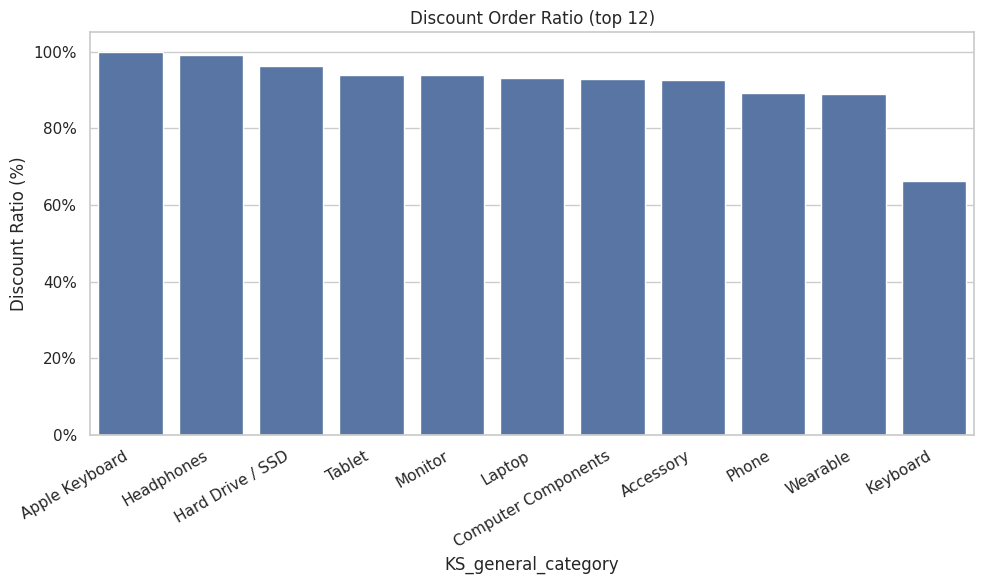

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=disc_by_cat, x=COL_CAT, y="discount_share")
plt.gca().set_ylabel("Discount Ratio (%)")
plt.gca().set_yticklabels([f"{t*100:.0f}%" for t in plt.gca().get_yticks()])
plt.title("Discount Order Ratio (top 12)")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
oop_merged['product_quantity'].describe()

,product_quantity
count,"53,231.00"
mean,1.13
std,0.82
min,1.00
25%,1.00
50%,1.00
75%,1.00
max,72.00


In [ ]:
disc_df = df_top[df_top["is_discounted"] & df_top["discount_pct"].notna()].copy()

Text(0.5, 1.0, 'Discount Distribution of Apple')

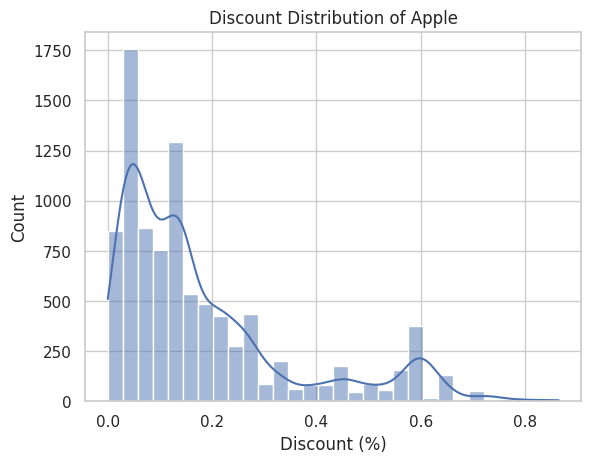

In [ ]:
disc_df2 = df_top[df_top["is_discounted"] & df_top["discount_pct"].notna()].copy()
disc_df2=disc_df2.query('brand_name == "Apple"')
sns.histplot(disc_df2['discount_pct'], bins=30, kde=True)
plt.xlabel("Discount (%)")
plt.title("Discount Distribution of Apple")



/tmp/ipython-input-1243922852.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f"{t*100:.0f}%" for t in plt.gca().get_yticks()])


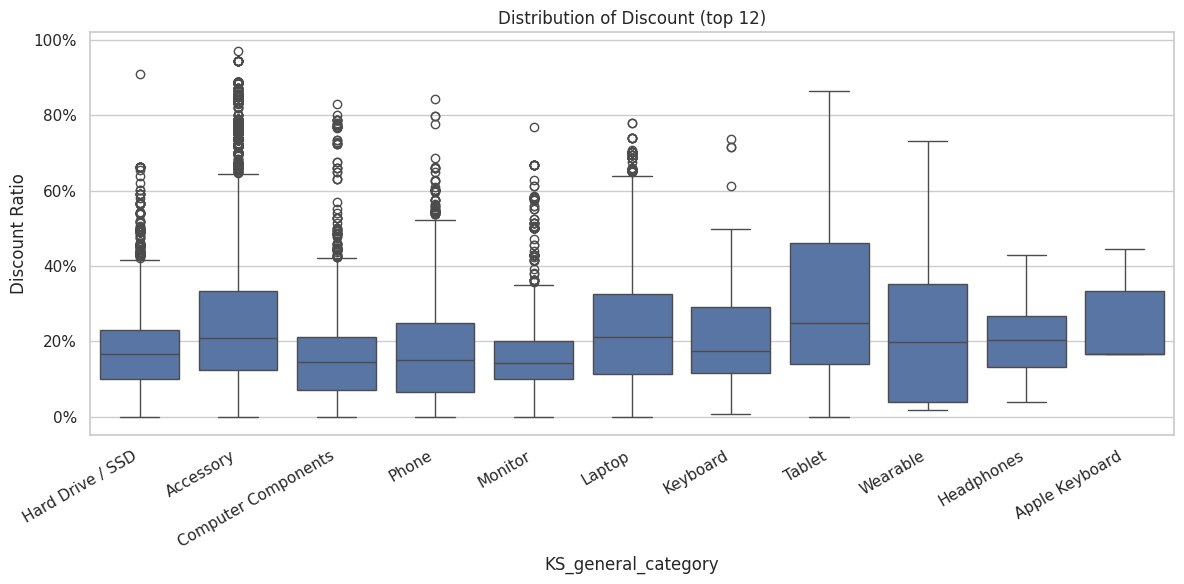

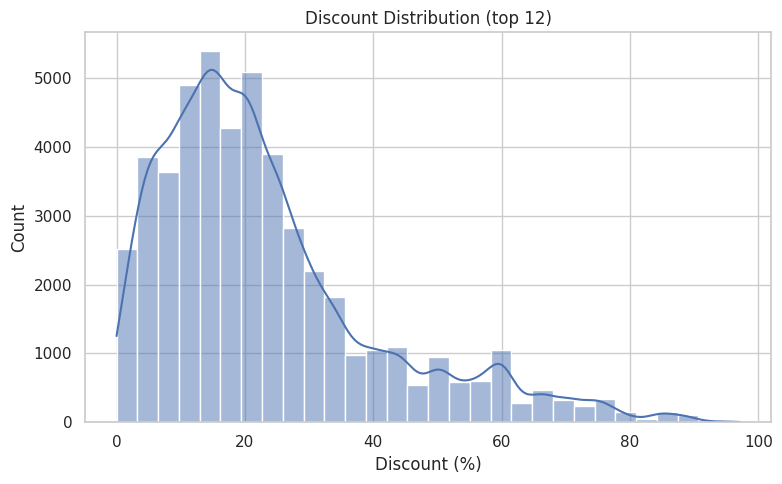

In [ ]:
disc_df = df_top[df_top["is_discounted"] & df_top["discount_pct"].notna()].copy()

plt.figure(figsize=(12,6))
sns.boxplot(data=disc_df, x=COL_CAT, y="discount_pct")
plt.gca().set_ylabel("Discount Ratio")
plt.gca().set_yticklabels([f"{t*100:.0f}%" for t in plt.gca().get_yticks()])
plt.title("Distribution of Discount (top 12)")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(disc_df["discount_pct"]*100, bins=30, kde=True)
plt.xlabel("Discount (%)")
plt.title("Discount Distribution (top 12)")
plt.tight_layout()
plt.show()


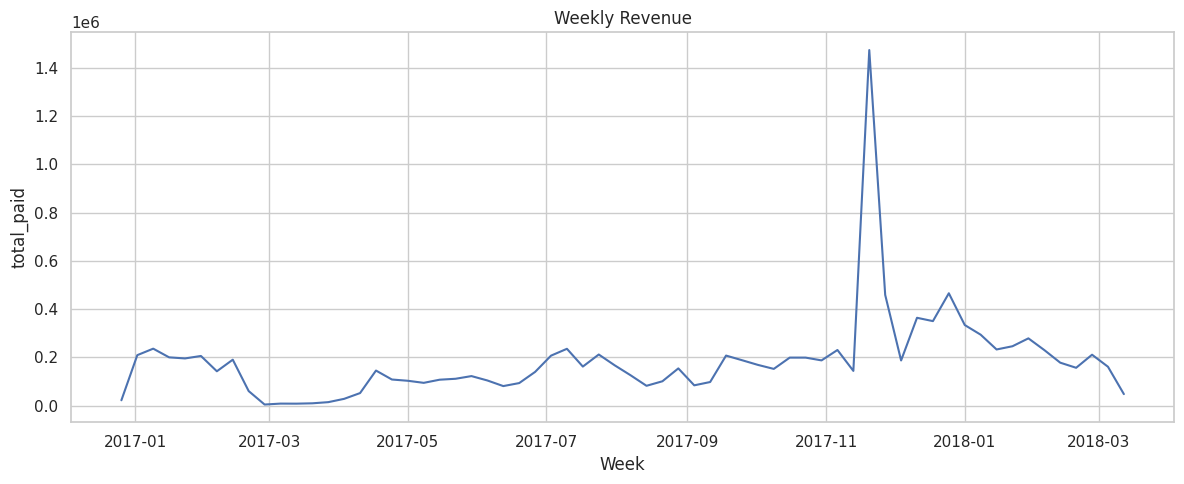

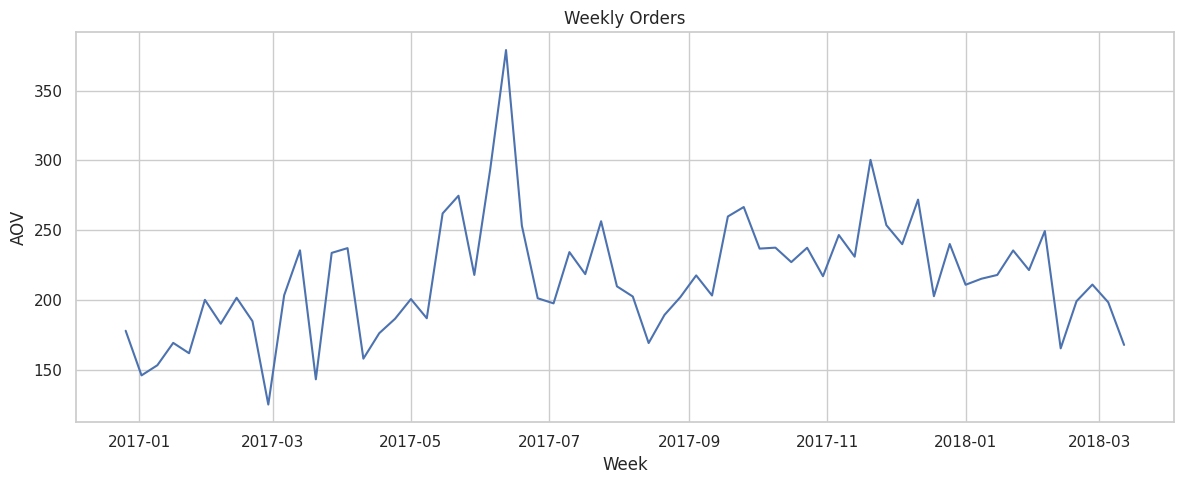

In [ ]:
ts = df.dropna(subset=[COL_DATE]).copy()
ts["week"] = ts[COL_DATE].dt.to_period("W").apply(lambda r: r.start_time)

weekly = ts.groupby("week").agg(
    orders=(COL_TOTAL, "size"),
    revenue=(COL_TOTAL, "sum"),
    aov=(COL_TOTAL, "mean")
).reset_index().sort_values("week")

fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=weekly, x="week", y="revenue", ax=ax)
ax.set_title("Weekly Revenue")
ax.set_xlabel("Week"); ax.set_ylabel("total_paid")
plt.tight_layout(); plt.show()

fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(data=weekly, x="week", y="aov", ax=ax)
ax.set_title("Weekly Orders")
ax.set_xlabel("Week"); ax.set_ylabel("AOV")
plt.tight_layout(); plt.show()


In [ ]:
kpi = {
    "rows": len(df),
    "date_min": df[COL_DATE].min(),
    "date_max": df[COL_DATE].max(),
    "n_categories": df[COL_CAT].nunique(),
    "discounted_rows": int(df["is_discounted"].sum()),
    "discounted_share_%": round(100*df["is_discounted"].mean(), 2)
}
pd.DataFrame([kpi])

,rows,date_min,date_max,n_categories,discounted_rows,discounted_share_%
0,53231,2017-01-01 01:46:16,2018-03-14 11:58:13,11,49404,92.81


In [ ]:
years = sorted(ts[COL_DATE].dt.year.dropna().unique())
windows = []


for y in years:
    d = pd.Timestamp(y, 11, 30)
    while d.weekday() != 4:
        d -= pd.Timedelta(days=1)
    bf_start, bf_end = d, d + pd.Timedelta(days=3)
    windows.append((y, "Black Friday (Fri–Mon)", bf_start, bf_end))

for y in years:
    windows.append((y, "Christmas (24–26 Dec)", pd.Timestamp(y,12,24), pd.Timestamp(y,12,26)))

def window_lift(df_weeks, start, end, value_col="revenue"):
    mask = (df_weeks["week"]>=start) & (df_weeks["week"]<=end)
    win = df_weeks.loc[mask, value_col].mean()
    month_mask = df_weeks["week"].dt.month == start.month
    base = df_weeks.loc[month_mask & (~mask), value_col].mean()
    if pd.isna(base) or base == 0:
        return np.nan
    return (win - base)/base

lifts = []
for y, name, s, e in windows:
    lifts.append({
        "year": y, "window": name,
        "lift_vs_month_avg_%": round(100*window_lift(weekly, s, e, "revenue"), 2)
    })

lift_df = pd.DataFrame(lifts)
lift_df


,year,window,lift_vs_month_avg_%
0,2017,Black Friday (Fri–Mon),-25.46
1,2018,Black Friday (Fri–Mon),NaN
2,2017,Christmas (24–26 Dec),101.43
3,2018,Christmas (24–26 Dec),NaN
